<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [0. Introduction](#0)   
* [1. Task](#1)
* [2. Explatory Data Analysis](#2)
    * [2.1 Uploading Datasets](#2.1)
    * [2.2 Detailed analysis of the dataset](#2.2)
* [3. Feature Engineering](#3)
* [4. Model Building](#4)
* [5. Evaluating](#5)
* [6. Further Invetigations](#6)
* [7. Conclusions](#7)

<div>
    <h1><left>Introduction</left></h1>
</div>

<div>
    <h1><center>---------------------------------------------------------------------------------------------------------------</center></h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Generating Random Floating Point Values
from numpy.random import seed
import random
from random import randrange

# System Operations
import sys
import os

pd.options.mode.chained_assignment = None

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

<div>
    <h1><left>Task</left></h1>
</div>

<div>
    <h1><center>---------------------------------------------------------------------------------------------------------------</center></h1>
</div>

<div>
    <h3><left>Uploading Datasets</left></h3>
</div>

In [2]:
df1 = pd.read_pickle("data.pickle")
df2 = pd.read_csv("data.csv")

df11 = pd.DataFrame(df1)
df11.columns = ['event']

C:\Users\ms\anaconda3\lib\site-packages\pandas\core\internals\construction.py:305: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [3]:
print(df1)
print("#"*120)
print(df1[0])
print("#"*120)
print(df1[0][0])
print("#"*120)
print(df1[0][0][0])
print("#"*120)
print(len(df1))

[array([[ 0.92134239,  0.15705078,  0.19742041, ..., -1.        ,
         1.        ,  0.99609375],
       [ 0.93982021,  0.03301524,  0.02876754, ..., -1.        ,
         1.        ,  0.99609375],
       [ 0.97547551,  0.03256229,  0.04597222, ..., -1.        ,
         1.        ,  0.99609375],
       ...,
       [ 0.98715203,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 0.93632737,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 0.89197855,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ]]), array([[ 9.57810483e-01,  6.66647160e-03,  1.01007145e-02, ...,
        -1.00000000e+00,  1.00000000e+00,  9.96093750e-01],
       [ 9.90271585e-01,  2.14668148e-03,  3.25254770e-03, ...,
        -1.00000000e+00,  1.00000000e+00,  9.96093750e-01],
       [ 7.73473344e-01,  2.98009900e-04,  4.51530151e-04, ...,
        -1.00000000e+00,  1.00000000e+00,  9.96093750e-01],
       ...,
 

In [4]:
#len(df1[0])
#len(df1[0][0])
#len(df1[0][0][0])

<div>
    <h3><left>Detailed analysis of the dataset</left></h3>
</div>

In [5]:
def check_df(dataframe, head=5):
    
    print("##################################################### SHAPE #####################################################")
    print(dataframe.shape)
    
    print("##################################################### TYPES #####################################################")
    print(dataframe.dtypes)
    
    print("#####################################################  HEAD  ####################################################")
    print(dataframe.head(head))
    
    print("#####################################################  TAIL  ####################################################")
    print(dataframe.tail(head))
    
    print("#####################################################   NA   ####################################################")
    print(dataframe.isnull().sum())
    
    print("#################################################### QUANTILES ##################################################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df2)

##################################################### SHAPE #####################################################
(2000, 4)
##################################################### TYPES #####################################################
unit_id           object
timestamp_utc      int64
X_length           int64
selected_event     int64
dtype: object
#####################################################  HEAD  ####################################################
  unit_id  timestamp_utc  X_length  selected_event
0    108h     1620811584       544               0
1    250h     1620511416       597               0
2    247h     1620121424       592               0
3    238h     1620480884       580               1
4    189h     1621103059       509               0
#####################################################  TAIL  ####################################################
     unit_id  timestamp_utc  X_length  selected_event
1995    189h     1621797223       592               1
1996  

In [7]:
# different lines have diffrenet number of events

for i in range(15):
    #print(df1[i])
    print(len(df1[i]))

544
597
592
580
509
520
598
600
517
566
542
600
583
585
596


In [8]:
# just to check a sample event

for i in range(len(df1[2][0])):
    print(df1[20][1][i])

0.9464564041441276
0.04792054133196154
0.061178318864995286
0.02285712388201407
0.09568888631846173
0.00015219634546135278
0.00499553253570798
-1.0
1.0
0.99609375


In [9]:
for i in df2.columns:
    print(df2[i].value_counts(dropna=False))

189h    172
247h    128
257h    112
108h     93
226h     84
272h     82
229h     66
274h     58
194h     58
238h     53
258h     47
293h     47
235h     46
273h     37
141h     37
165h     37
168h     37
223h     36
264h     35
234h     35
57h      34
250h     32
123h     32
256h     29
147h     28
127h     28
246h     27
261h     26
277h     26
298h     23
118h     22
137h     21
193h     21
284h     21
188h     20
262h     19
107h     19
259h     17
186h     17
286h     17
144h     17
124h     16
255h     15
332h     15
222h     15
296h     14
248h     14
221h     14
109h     13
97h      13
260h     13
230h     12
121h     11
288h     10
239h      9
292h      6
190h      4
164h      4
196h      3
105h      3
Name: unit_id, dtype: int64
1621194751    1
1620610383    1
1615779846    1
1620473144    1
1620466661    1
             ..
1618729682    1
1620433620    1
1619662522    1
1618541272    1
1620235698    1
Name: timestamp_utc, Length: 2000, dtype: int64
600    447
599    205
598   

In [10]:
# merging two data file

dfnew = df2.join(df11)
dfnew

unit_id  timestamp_utc  X_length  selected_event  \
0       108h     1620811584       544               0   
1       250h     1620511416       597               0   
2       247h     1620121424       592               0   
3       238h     1620480884       580               1   
4       189h     1621103059       509               0   
...      ...            ...       ...             ...   
1995    189h     1621797223       592               1   
1996    124h     1619567803       600               0   
1997    261h     1614738612       600               0   
1998    256h     1619382545       600               0   
1999    124h     1619907715       600               0   

                                                  event  
0     [[0.9213423880793828, 0.1570507837658963, 0.19...  
1     [[0.9578104825412086, 0.006666471598002497, 0....  
2     [[0.8681918036512385, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3     [[0.9494539175706812, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4     [[0.9191844417282122, 0.006705569973447743, 0....  
...                                                 ...  
1995  [[0.934364214039178, 0.1692483057993192, 0.191...  
1996  [[0.8221272768158309, 0.01790885934610419, 0.0...  
1997  [[0.9220199244245963, 0.09580613876438364, 0.1...  
1998  [[0.9467386463846738, 0.0022596037365063128, 0...  
1999  [[0.9712309083476818, 0.006208882739927154, 0....  

[2000 rows x 5 columns]

In [11]:
# Expanding event column into new rows, now we have 1150336 rows × 5 columns

df = dfnew.explode('event')
df

unit_id  timestamp_utc  X_length  selected_event  \
0       108h     1620811584       544               0   
0       108h     1620811584       544               0   
0       108h     1620811584       544               0   
0       108h     1620811584       544               0   
0       108h     1620811584       544               0   
...      ...            ...       ...             ...   
1999    124h     1619907715       600               0   
1999    124h     1619907715       600               0   
1999    124h     1619907715       600               0   
1999    124h     1619907715       600               0   
1999    124h     1619907715       600               0   

                                                  event  
0     [0.9213423880793828, 0.1570507837658963, 0.197...  
0     [0.9398202085580728, 0.0330152422990655, 0.028...  
0     [0.9754755060852548, 0.032562285611121136, 0.0...  
0     [0.9395737137792518, 0.01116012500423074, 0.01...  
0     [0.9204113034963642, 0.014498198284313181, 0.0...  
...                                                 ...  
1999  [0.9852941176470588, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1999  [0.9854014598540146, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1999  [0.9499029045986036, 0.0013796909492273732, 0....  
1999  [0.958008120674058, 0.00886118959905576, 0.001...  
1999  [0.9772727272727272, 0.01782054000565451, 0.00...  

[1150336 rows x 5 columns]

In [12]:
check_df(df)

##################################################### SHAPE #####################################################
(1150336, 5)
##################################################### TYPES #####################################################
unit_id           object
timestamp_utc      int64
X_length           int64
selected_event     int64
event             object
dtype: object
#####################################################  HEAD  ####################################################
  unit_id  timestamp_utc  X_length  selected_event  \
0    108h     1620811584       544               0   
0    108h     1620811584       544               0   
0    108h     1620811584       544               0   
0    108h     1620811584       544               0   
0    108h     1620811584       544               0   

                                               event  
0  [0.9213423880793828, 0.1570507837658963, 0.197...  
0  [0.9398202085580728, 0.0330152422990655, 0.028...  
0  [0.9754755060

In [13]:
# splitting each element of the list under new feature. Now we have 1150336 rows × 14 columns.

df[['event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_6', 'event_7', 'event_8', 'evet_9', 'event_10']] = \
pd.DataFrame(df['event'].tolist(), index= df.index)
df.drop('event', axis=1, inplace=True)
df

unit_id  timestamp_utc  X_length  selected_event   event_1   event_2  \
0       108h     1620811584       544               0  0.921342  0.157051   
0       108h     1620811584       544               0  0.939820  0.033015   
0       108h     1620811584       544               0  0.975476  0.032562   
0       108h     1620811584       544               0  0.939574  0.011160   
0       108h     1620811584       544               0  0.920411  0.014498   
...      ...            ...       ...             ...       ...       ...   
1999    124h     1619907715       600               0  0.985294  0.000000   
1999    124h     1619907715       600               0  0.985401  0.000000   
1999    124h     1619907715       600               0  0.949903  0.001380   
1999    124h     1619907715       600               0  0.958008  0.008861   
1999    124h     1619907715       600               0  0.977273  0.017821   

       event_3   event_4   event_5   event_6   event_7       event_8  evet_9  \
0     0.197420  0.081071  0.150974  0.163127  0.191087 -1.000000e+00     1.0   
0     0.028768  0.042511  0.041794  0.024237  0.005871 -1.000000e+00     1.0   
0     0.045972  0.006729  0.020058  0.045067  0.199779 -1.000000e+00     1.0   
0     0.016909  0.000000  0.012180  0.010140  0.196310 -1.000000e+00     1.0   
0     0.020829  0.002277  0.013018  0.015979  0.198834 -1.000000e+00     1.0   
...        ...       ...       ...       ...       ...           ...     ...   
1999  0.000000  0.000000  0.000000  0.000000  0.007467  1.116755e-08     0.0   
1999  0.000000  0.000000  0.000000  0.000000  0.002692  3.280180e-08     0.0   
1999  0.000000  0.004181  0.001207  0.001552  0.002275  6.082929e-08     0.0   
1999  0.001152  0.024549  0.005329  0.012393  0.001674  3.148353e-07     0.0   
1999  0.004043  0.045916  0.027566  0.008075  0.000743  2.714746e-07     0.0   

      event_10  
0     0.996094  
0     0.996094  
0     0.996094  
0     0.996094  
0     0.996094  
...        ...  
1999  0.000000  
1999  0.000000  
1999  0.000000  
1999  0.000000  
1999  0.000000  

[1150336 rows x 14 columns]

In [14]:
df.isnull().sum().sum()  # 0 nulls

0

In [15]:
df.duplicated().sum()  # 2092 rows are duplicated

2092

In [16]:
# duplicated rows dropped.

df = df.drop_duplicates(keep='first')

In [17]:
check_df(df)

##################################################### SHAPE #####################################################
(1148244, 14)
##################################################### TYPES #####################################################
unit_id            object
timestamp_utc       int64
X_length            int64
selected_event      int64
event_1           float64
event_2           float64
event_3           float64
event_4           float64
event_5           float64
event_6           float64
event_7           float64
event_8           float64
evet_9            float64
event_10          float64
dtype: object
#####################################################  HEAD  ####################################################
  unit_id  timestamp_utc  X_length  selected_event   event_1   event_2  \
0    108h     1620811584       544               0  0.921342  0.157051   
0    108h     1620811584       544               0  0.939820  0.033015   
0    108h     1620811584       544          

In [18]:
# Converting timestamp into reabable format, so that I will create new features from it.

datetime = pd.to_datetime(df['timestamp_utc'], unit='s')
df['datetime'] = datetime
df.drop('timestamp_utc', axis=1, inplace=True)
df

unit_id  X_length  selected_event   event_1   event_2   event_3  \
0       108h       544               0  0.921342  0.157051  0.197420   
0       108h       544               0  0.939820  0.033015  0.028768   
0       108h       544               0  0.975476  0.032562  0.045972   
0       108h       544               0  0.939574  0.011160  0.016909   
0       108h       544               0  0.920411  0.014498  0.020829   
...      ...       ...             ...       ...       ...       ...   
1999    124h       600               0  0.985294  0.000000  0.000000   
1999    124h       600               0  0.985401  0.000000  0.000000   
1999    124h       600               0  0.949903  0.001380  0.000000   
1999    124h       600               0  0.958008  0.008861  0.001152   
1999    124h       600               0  0.977273  0.017821  0.004043   

       event_4   event_5   event_6   event_7       event_8  evet_9  event_10  \
0     0.081071  0.150974  0.163127  0.191087 -1.000000e+00     1.0  0.996094   
0     0.042511  0.041794  0.024237  0.005871 -1.000000e+00     1.0  0.996094   
0     0.006729  0.020058  0.045067  0.199779 -1.000000e+00     1.0  0.996094   
0     0.000000  0.012180  0.010140  0.196310 -1.000000e+00     1.0  0.996094   
0     0.002277  0.013018  0.015979  0.198834 -1.000000e+00     1.0  0.996094   
...        ...       ...       ...       ...           ...     ...       ...   
1999  0.000000  0.000000  0.000000  0.007467  1.116755e-08     0.0  0.000000   
1999  0.000000  0.000000  0.000000  0.002692  3.280180e-08     0.0  0.000000   
1999  0.004181  0.001207  0.001552  0.002275  6.082929e-08     0.0  0.000000   
1999  0.024549  0.005329  0.012393  0.001674  3.148353e-07     0.0  0.000000   
1999  0.045916  0.027566  0.008075  0.000743  2.714746e-07     0.0  0.000000   

                datetime  
0    2021-05-12 09:26:24  
0    2021-05-12 09:26:24  
0    2021-05-12 09:26:24  
0    2021-05-12 09:26:24  
0    2021-05-12 09:26:24  
...                  ...  
1999 2021-05-01 22:21:55  
1999 2021-05-01 22:21:55  
1999 2021-05-01 22:21:55  
1999 2021-05-01 22:21:55  
1999 2021-05-01 22:21:55  

[1148244 rows x 14 columns]

In [19]:
# Create a copy of current status of df.

df_backup = df.copy()

In [20]:
check_df(df)

##################################################### SHAPE #####################################################
(1148244, 14)
##################################################### TYPES #####################################################
unit_id                   object
X_length                   int64
selected_event             int64
event_1                  float64
event_2                  float64
event_3                  float64
event_4                  float64
event_5                  float64
event_6                  float64
event_7                  float64
event_8                  float64
evet_9                   float64
event_10                 float64
datetime          datetime64[ns]
dtype: object
#####################################################  HEAD  ####################################################
  unit_id  X_length  selected_event   event_1   event_2   event_3   event_4  \
0    108h       544               0  0.921342  0.157051  0.197420  0.081071   
0    108h 

In [21]:
# Drop since its a kind of id.

df['unit_id'].value_counts()  
df.drop('unit_id', axis=1, inplace=True)

In [22]:
# Target column. Smote may be applied, Statified should be used at model split.

df['selected_event'].value_counts()  

0    1015997
1     132247
Name: selected_event, dtype: int64

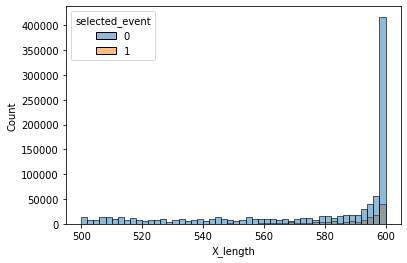

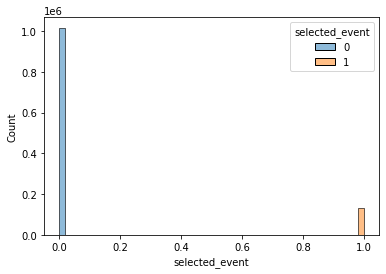

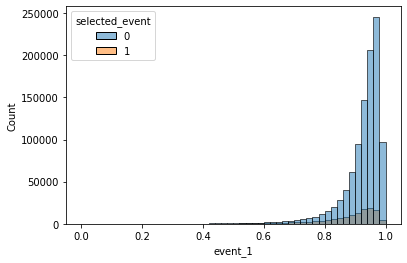

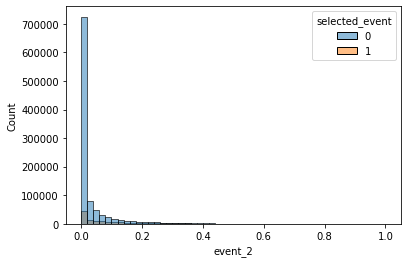

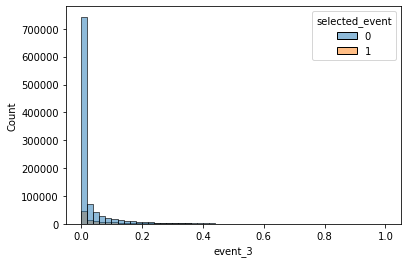

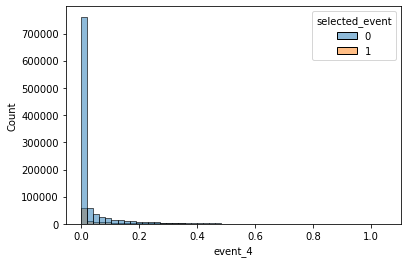

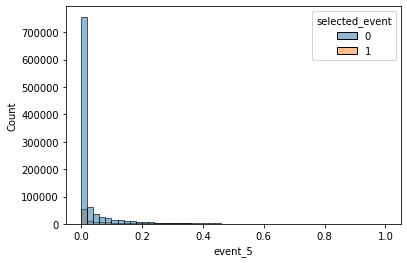

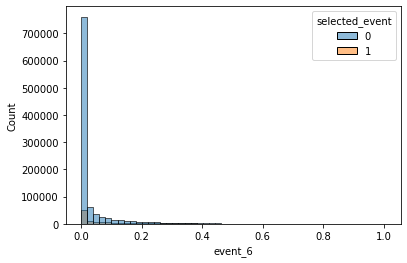

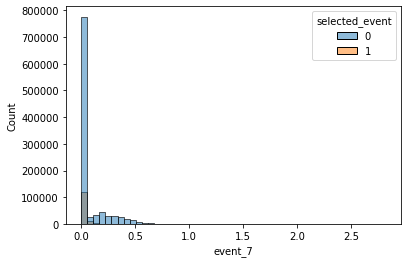

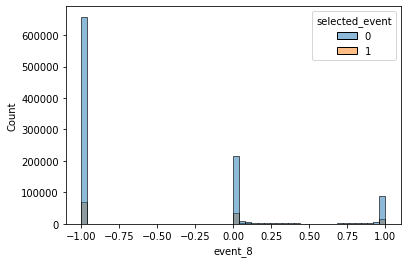

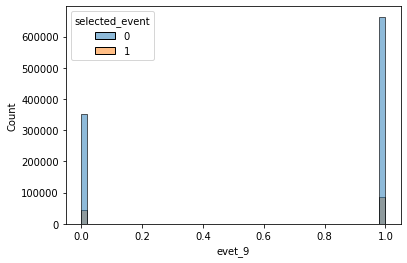

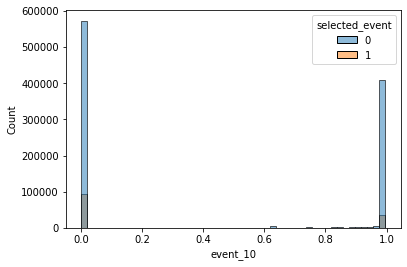

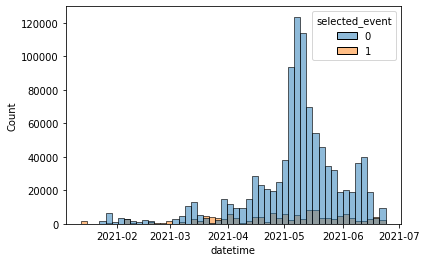

In [23]:
# distribution checks.

for col in df.columns:
    sns.histplot(x = col, bins = 50, hue='selected_event', data = df)
    plt.show()

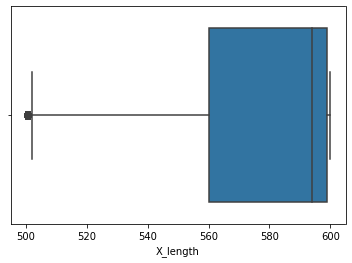

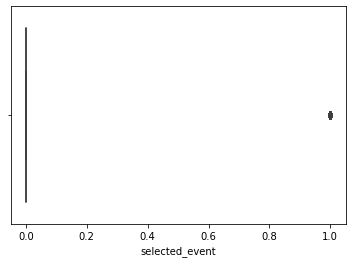

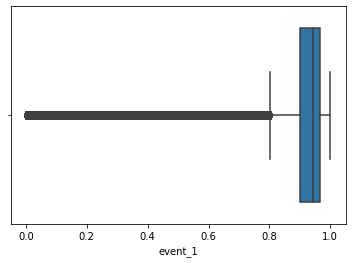

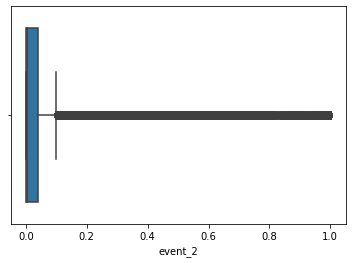

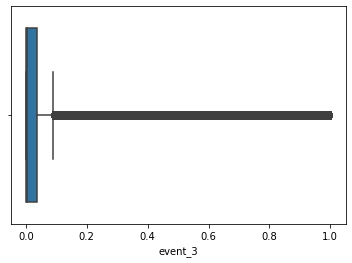

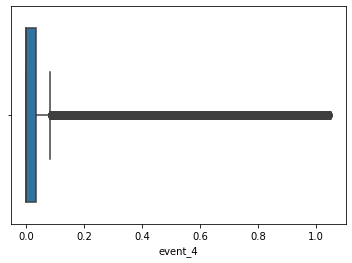

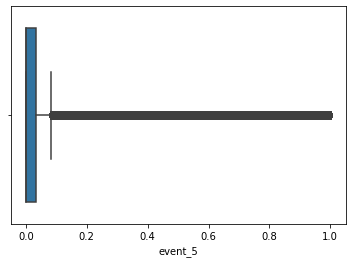

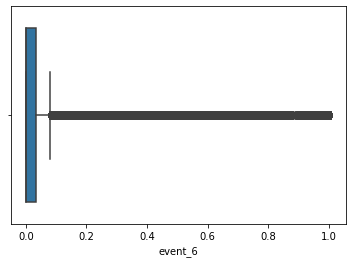

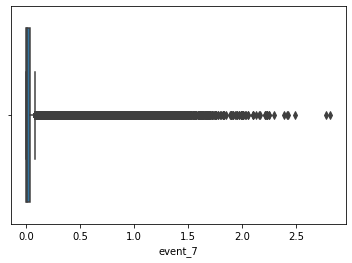

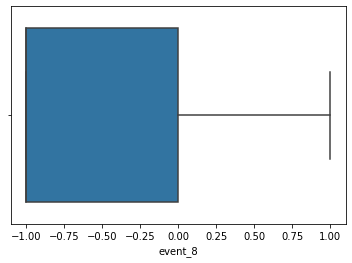

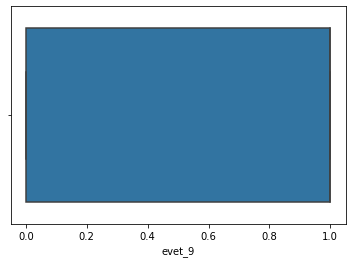

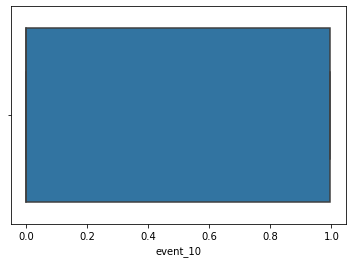

In [24]:
# outlier detection, i will leave it as it is.

cols = list(df.columns)
cols.remove("datetime")

for col in cols:
    sns.boxplot(x = col, data = df)
    plt.show()

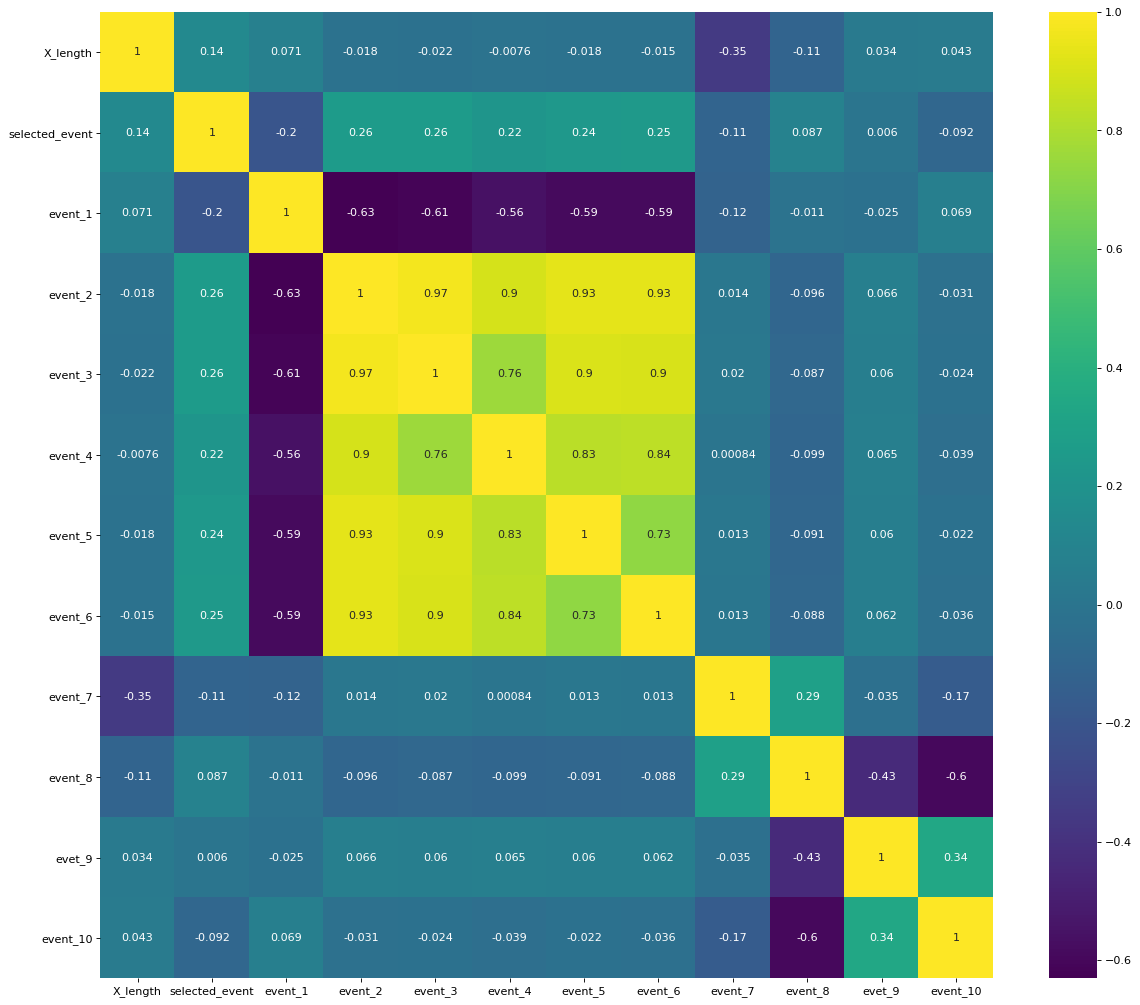

In [25]:
# It seems that between event_2 and event_6 are strong positively correlated. 
# Since I will use tree based models, I will not drop correlated columns.

figure(figsize=(18, 16), dpi=80)

sns.heatmap(df.corr(), cmap = "viridis", annot = True)
plt.show()

In [26]:
print(df['datetime'].max())  # Timestamp('2021-06-23 20:18:09')
print(df['datetime'].min())  # Timestamp('2021-01-12 19:54:30')

2021-06-23 20:18:09
2021-01-12 19:54:30


<div>
    <h1><left>Feature Engineering</left></h1>
</div>

In [27]:
# since we are not aware the real meaning of the features, I will not build possible future.

In [28]:
# hour of the day
df['new_hour'] = df['datetime'].dt.hour

#time phase of the day
df['new_is_morning'] = df['new_hour'].apply(lambda x: 1 if 6 <= x <= 12 else 0)
df['new_is_afternoon'] = df['new_hour'].apply(lambda x: 1 if 13 <= x <= 18 else 0)
df['new_is_evening'] = df['new_hour'].apply(lambda x: 1 if 19 <= x <= 23 else 0)
df['new_is_night'] = df['new_hour'].apply(lambda x: 1 if 0 <= x <= 5 else 0)

# from hourly histplot i want create new columns with division of 0-4, 5-17 and 18-23
df['new_is_time1'] = df['new_hour'].apply(lambda x: 1 if 0 <= x <= 4 else 0)
df['new_is_time2'] = df['new_hour'].apply(lambda x: 1 if 5 <= x <= 17 else 0)
df['new_is_time3'] = df['new_hour'].apply(lambda x: 1 if 18 <= x <= 23 else 0)

# we have data from January to June i will create new columns for winter, spring or summer.
# No need to make for summer to preserve dummy cols, if its not winter or spring that means it is summer.
df['new_is_winter'] = df['datetime'].dt.month.apply(lambda x: 1 if 1 <= x <= 2 else 0)
df['new_is_spring'] = df['datetime'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 0)

In [29]:
check_df(df)

##################################################### SHAPE #####################################################
(1148244, 23)
##################################################### TYPES #####################################################
X_length                     int64
selected_event               int64
event_1                    float64
event_2                    float64
event_3                    float64
event_4                    float64
event_5                    float64
event_6                    float64
event_7                    float64
event_8                    float64
evet_9                     float64
event_10                   float64
datetime            datetime64[ns]
new_hour                     int64
new_is_morning               int64
new_is_afternoon             int64
new_is_evening               int64
new_is_night                 int64
new_is_time1                 int64
new_is_time2                 int64
new_is_time3                 int64
new_is_winter          

In [30]:
# Now we have 1148244 rows, 21 columns.

df.drop('new_hour', axis=1, inplace=True)
df.set_index('datetime', inplace=True)
df

X_length  selected_event   event_1   event_2   event_3  \
datetime                                                                      
2021-05-12 09:26:24       544               0  0.921342  0.157051  0.197420   
2021-05-12 09:26:24       544               0  0.939820  0.033015  0.028768   
2021-05-12 09:26:24       544               0  0.975476  0.032562  0.045972   
2021-05-12 09:26:24       544               0  0.939574  0.011160  0.016909   
2021-05-12 09:26:24       544               0  0.920411  0.014498  0.020829   
...                       ...             ...       ...       ...       ...   
2021-05-01 22:21:55       600               0  0.985294  0.000000  0.000000   
2021-05-01 22:21:55       600               0  0.985401  0.000000  0.000000   
2021-05-01 22:21:55       600               0  0.949903  0.001380  0.000000   
2021-05-01 22:21:55       600               0  0.958008  0.008861  0.001152   
2021-05-01 22:21:55       600               0  0.977273  0.017821  0.004043   

                      event_4   event_5   event_6   event_7       event_8  \
datetime                                                                    
2021-05-12 09:26:24  0.081071  0.150974  0.163127  0.191087 -1.000000e+00   
2021-05-12 09:26:24  0.042511  0.041794  0.024237  0.005871 -1.000000e+00   
2021-05-12 09:26:24  0.006729  0.020058  0.045067  0.199779 -1.000000e+00   
2021-05-12 09:26:24  0.000000  0.012180  0.010140  0.196310 -1.000000e+00   
2021-05-12 09:26:24  0.002277  0.013018  0.015979  0.198834 -1.000000e+00   
...                       ...       ...       ...       ...           ...   
2021-05-01 22:21:55  0.000000  0.000000  0.000000  0.007467  1.116755e-08   
2021-05-01 22:21:55  0.000000  0.000000  0.000000  0.002692  3.280180e-08   
2021-05-01 22:21:55  0.004181  0.001207  0.001552  0.002275  6.082929e-08   
2021-05-01 22:21:55  0.024549  0.005329  0.012393  0.001674  3.148353e-07   
2021-05-01 22:21:55  0.045916  0.027566  0.008075  0.000743  2.714746e-07   

                     ...  event_10  new_is_morning  new_is_afternoon  \
datetime             ...                                               
2021-05-12 09:26:24  ...  0.996094               1                 0   
2021-05-12 09:26:24  ...  0.996094               1                 0   
2021-05-12 09:26:24  ...  0.996094               1                 0   
2021-05-12 09:26:24  ...  0.996094               1                 0   
2021-05-12 09:26:24  ...  0.996094               1                 0   
...                  ...       ...             ...               ...   
2021-05-01 22:21:55  ...  0.000000               0                 0   
2021-05-01 22:21:55  ...  0.000000               0                 0   
2021-05-01 22:21:55  ...  0.000000               0                 0   
2021-05-01 22:21:55  ...  0.000000               0                 0   
2021-05-01 22:21:55  ...  0.000000               0                 0   

                     new_is_evening  new_is_night  new_is_time1  new_is_time2  \
datetime                                                                        
2021-05-12 09:26:24               0             0             0             1   
2021-05-12 09:26:24               0             0             0             1   
2021-05-12 09:26:24               0             0             0             1   
2021-05-12 09:26:24               0             0             0             1   
2021-05-12 09:26:24               0             0             0             1   
...                             ...           ...           ...           ...   
2021-05-01 22:21:55               1             0             0             0   
2021-05-01 22:21:55               1             0             0             0   
2021-05-01 22:21:55               1             0             0             0   
2021-05-01 22:21:55               1             0             0             0   
2021-05-01 22:21:55               1             0             0             0   



<div>
    <h1><left>Model Building</left></h1>
</div>

In [31]:
X = df.drop(["selected_event"], axis=1)
y = df["selected_event"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [32]:
# I use stratify paramter for all my classification problems to split y properly which means proportionally

y.value_counts()

0    1015997
1     132247
Name: selected_event, dtype: int64

In [33]:
print(X_train.shape)  
print(X_test.shape) 

(803770, 20)
(344474, 20)


In [34]:
# dropout method.

rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

<div>
    <h1><left>Evaluating</left></h1>
</div>

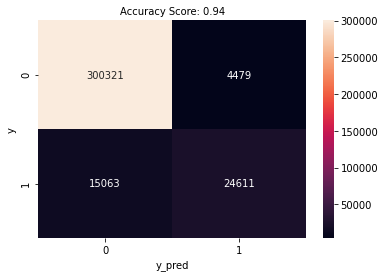

In [35]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
    
plot_confusion_matrix(y_test, y_pred)

In [36]:
# ACCURACY
accuracy_score(y_test, y_pred)

0.9432700290878266

In [37]:
# PRECISION
precision_score(y_test, y_pred)

0.846029563423857

In [38]:
# RECALL
recall_score(y_test, y_pred)

0.6203306951655997

In [39]:
# F1
f1_score(y_test, y_pred)

0.7158105985690186

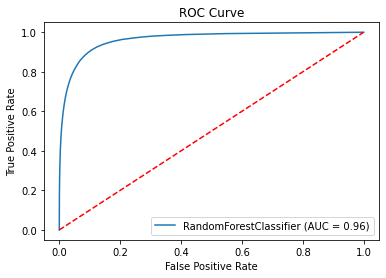

In [40]:
# ROC CURVE
plot_roc_curve(rf_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [41]:
# AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.9628277686322663

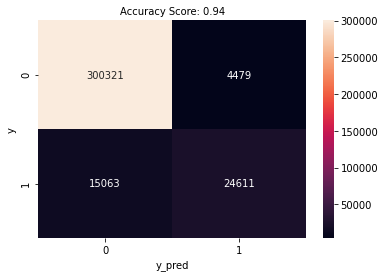

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    304800
           1       0.85      0.62      0.72     39674

    accuracy                           0.94    344474
   macro avg       0.90      0.80      0.84    344474
weighted avg       0.94      0.94      0.94    344474



In [42]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

#    precision    recall  f1-score   support

#            0       0.95      0.99      0.97    304800
#            1       0.85      0.62      0.72     39674

#     accuracy                           0.94    344474
#    macro avg       0.90      0.80      0.84    344474
# weighted avg       0.94      0.94      0.94    344474



In [43]:
# Accurcy is 94 % but it may provide a "misleading information" due to our data set which seems unbalanced.
# F1 score is also important which is harmanic mean of prediction and recall
# Here we may look at recall on 1 which represents TRUE - POSITIVE to catch events
# we estimated 24611 real events out of 39674 events as having positive.

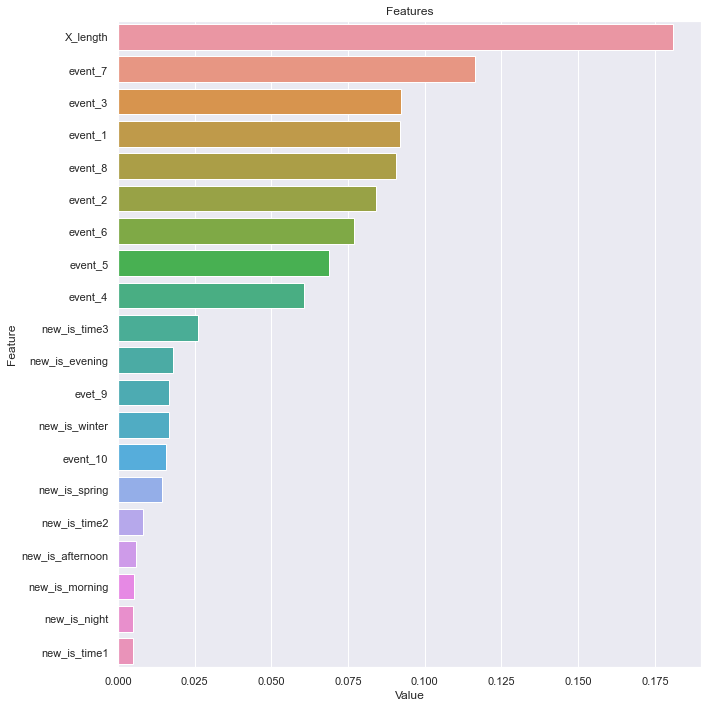

In [44]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

<div>
    <h1><left>Further Invetigations</left></h1>
</div>

In [45]:
def run_single_model():
    models = [
              ('RF', RandomForestClassifier()),
              #('GBM', GradientBoostingClassifier()),
              ("XGBoost", XGBClassifier(objective="binary:logistic")),
              ("LightGBM", LGBMClassifier()),
              #("CatBoost", CatBoostClassifier(verbose=False)),
              #("AdaBoost", AdaBoostClassifier()),
              #("Bagging", BaggingClassifier()),
              #("ExtraTrees", ExtraTreesClassifier()),
              #("HistGradient", HistGradientBoostingClassifier())
            ]

    global output_df
    output_df = pd.DataFrame(models, columns=["MODEL_NAME", "MODEL_BASE"])
    output_df.drop('MODEL_BASE', axis=1, inplace=True)
    for name, classifier in models:
        recall_cv = np.mean(cross_val_score(classifier, X, y, cv=3, scoring="recall"))
        print(f"recall_cv: {round(recall_cv, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "RECALL_BASE_CV_ALL"] = recall_cv

    ## HYPER PARAMETERS TUNNING
    rf_params = {"max_depth": [5, 15, 20, None],
                 "max_features": [5, 7, 9,  "auto"],
                 "min_samples_split": [6, 8, 15],
                 "n_estimators": [150, 200, 300]}

    xgboost_params = {"learning_rate": [ 0.01, 0.05, 0.1, 0.15],
                      "max_depth": [3, 5, 8],
                      "n_estimators": [100, 200, 300],
                      "colsample_bytree": [0.3, 0.5, 0.8]}

    lightgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
                       "n_estimators": [100, 300, 500],
                       "colsample_bytree": [0.1, 0.3, 0.7, 1]}

    extraTrees_params = {
                        'n_estimators': [10, 50, 100],
                        'max_depth': [2, 16, 50],
                        'min_samples_split': [2, 6],
                        'min_samples_leaf': [1, 2],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'bootstrap': [True, False],
                        'warm_start': [True, False],
                        }

    HistGradient_params = {"learning_rate": [0.01, 0.05],
                       "max_iter": [20, 100],
                       "max_depth": [None, 25],
                       "l2_regularization": [0.0, 1.5],
                           }

    classifiers = [
                  ("RF", RandomForestClassifier(), rf_params),
                  ('XGBoost', XGBClassifier(objective='reg:squarederror'), xgboost_params),
                  ('LightGBM', LGBMClassifier(), lightgbm_params),
                  #('ExtraTrees', ExtraTreesClassifier(), extraTrees_params),
                  #('HistGradient', HistGradientBoostingClassifier(), HistGradient_params)
                  ]
    global best_models
    best_models = {}

    for name, classifier, params in classifiers:
        #GridSearch
        gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)
        recall_cv = np.mean(cross_val_score(final_model, X, y, cv=3, scoring="recall"))
        print(f"recall_cv (After): {round(recall_cv, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "ReCALL_TUNED_CV_ALL"] = recall_cv
        #print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        output_df.loc[output_df['MODEL_NAME'] == name, "BEST_PARAMS"] = str(gs_best.best_params_)

        best_models[name] = final_model



In [46]:
def run_multiple_model():
    ######################################################
    # # Stacking & Ensemble Learning
    ######################################################
    best_models

    model_name = 'voting_reg_RF_LGBM'
    model = VotingClassifier(estimators=[('RF', best_models["RF"]), ('LightGBM', best_models["LightGBM"])])
    model.fit(X, y)
    recall_cv = np.mean(cross_val_score(model, X, y, cv=5, scoring="recall"))
    print(f"recall_cv ({model_name}): {round(recall_cv, 4)} ")
    global output_df
    output_df = output_df.append({'MODEL_NAME': {model_name}}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == {model_name}, "ReCALL_TUNED_CV_ALL"] = recall_cv
    best_models[model_name] = model



    estimators = [('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"])]
    stacking_reg = StackingClassifier(estimators=estimators, final_estimator=best_models["LightGBM"])
    stacking_reg.fit(X, y)
    stacking_reg_recall = np.mean(cross_val_score(stacking_reg, X, y, cv=5, scoring="recall"))
    print(f"RECALL (stacking_reg_RF_XG): {round(stacking_reg_recall, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "stacking_reg_rmse"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "stacking_reg_rmse", "ReCALL_TUNED_CV_ALL"] = stacking_reg_recall
    best_models['stacking_reg_RF_XG'] = stacking_reg

    voting_reg_RF_XG_LGBM = VotingClassifier(estimators=[('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"]), ('LightGBM', best_models["LightGBM"])])
    voting_reg_RF_XG_LGBM.fit(X, y)
    voting_reg_recall = np.mean(cross_val_score(voting_reg_RF_XG_LGBM, X, y, cv=5, scoring="recall"))
    print(f"RECALL (voting_reg_RF_XG_LGBM): {round(voting_reg_recall, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "voting_reg_RF_XG_LGBM"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "voting_reg_RF_XG_LGBM", "ReCALL_TUNED_CV_ALL"] = voting_reg_recall
    best_models['voting_reg_RF_XG_LGBM'] = voting_reg_RF_XG_LGBM


In [ ]:
run_single_model()

# recall_cv: 0.389 (RF) 
# recall_cv: 0.3358 (XGBoost) 
# recall_cv: 0.3459 (LightGBM) 

# It took too much time to complete. That is why I have canceled it.

In [ ]:
run_multiple_model()

# Normaly in here,, I planned to check multiple models by stacking.

In [ ]:
final_model = 

# Normaly in here, I decide the final model that I select to use.

In [ ]:
pickle.dump(final_model, open("horse_protector_model.pkl", 'wb'))

# Dumping model to share

<div>
    <h1><left>Conclusions</left></h1>
</div>

<div>
    <h1><left>Thanks!</left></h1>
</div>